# Классификация жалоб клиентов

Датасет содержит информацию о жалобах клиентов на различные продукты и услуги в финансовом секторе, такие как кредитные отчеты, студенческие ссуды, денежные переводы и т.д. Требуется классифицировать на какие продукты и услуги клиенты отправляют жалобы. Объем выборки $N=320589$, количество признаков $d=18$, количество классов $K=18$.

## 1. Загрузка данных

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn
import seaborn as sns

In [10]:
url = "https://media.githubusercontent.com/media/ksenia1009/ML_intro/master/data.csv"
data_raw = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data_raw.shape

(320589, 18)

In [12]:
data_raw.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460
2,05/10/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Diversified Consultants, Inc.",SC,296XX,Servicemember,NaN,Web,05/10/2019,In progress,Yes,NaN,3238545


In [13]:
data_raw.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

Видим, что столбцы (признаки) имеют следующие имена:  
* **Date received** - дата получения жалобы (числовой признак)
* **Product** - продукт (номинальный)
* **Sub-product** - суб-продукт (номинальный)
* **Issue** - жалоба клиента (номинальный)
* **Sub-issue** - конкретная формулировка жалобы (номинальный)
* **Consumer complaint narrative** - описание жалобы (номинальный)
* **Company public response** - ответ компании (номинальный)
* **Company** - компания (номинальный)
* **State** - страна (номинальный)
* **ZIP** code - индекс (числовой)
* **Tags** - тэг (номинальный)
* **Consumer consent provided?** - предоставлено ли согласие клиента? (номинальный)
* **Submitted via** - способ отправление жалобы (номинальный)
* **Date sent to company** - дата отправления жалобы в компанию (числовой)
* **Company response to consumer** - статус ответа компании (номинальный)
* **Timely response?** - вовремя ли получен ответ (бинарный)
* **Consumer disputed?** - оспорен ли ответ компании клиентом? (бинарный)
* **Complaint ID** - идентификатор клиента (числовой)

## 2. Визуализация данных

In [14]:
data_raw.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,320589,320589,261841,320589,187704,96189,112593,320589,315734,291569,43991,172648,320589,320589,320588,320589,192125,3.205890e+05
unique,2717,18,76,164,215,94398,10,3755,63,15131,3,4,6,2655,8,2,2,NaN
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,09/08/2017,Closed with explanation,Yes,No,NaN
freq,888,69084,55375,33534,14655,235,78245,28538,43853,1874,21178,96263,236272,840,248222,312560,155296,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.929833e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.645244e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.124124e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.123204e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.798915e+06


По данной таблице видно, что практически все признаки являются категориальными. Числовой признак **Complaint ID**, для которого рассчитаны среднее, разброс и т.д., не влияет на классификацию данных, поскольку он является уникальным идентификатором каждого клиента, и по большому счету его можно исключить.

In [15]:
data_raw = data_raw.drop('Complaint ID', axis = 1)

Также можно исключить столбец **Date sent to company**, поскольку он практически повторяет значения столбца **Date received**.

In [16]:
data_raw = data_raw.drop('Date sent to company', axis = 1)

In [17]:
data_raw.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
count,320589,320589,261841,320589,187704,96189,112593,320589,315734,291569,43991,172648,320589,320588,320589,192125
unique,2717,18,76,164,215,94398,10,3755,63,15131,3,4,6,8,2,2
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,Closed with explanation,Yes,No
freq,888,69084,55375,33534,14655,235,78245,28538,43853,1874,21178,96263,236272,248222,312560,155296


Посмотрим на категориальные признаки.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


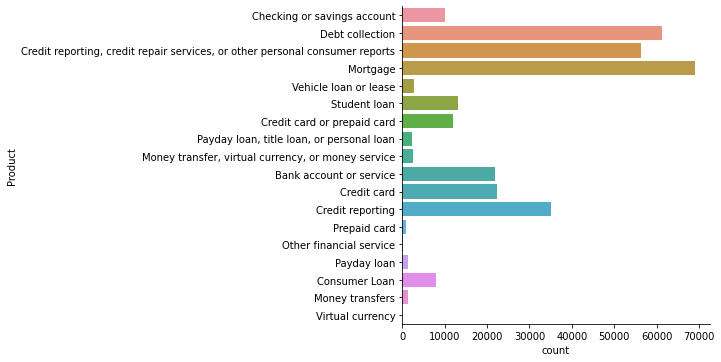

In [18]:
sns.catplot(kind="count", y = "Product", data = data_raw)
pass

Как видно, классы несбалансированы. Большинство жалоб относятся к **Mortage**, **Debt collection** и **Credit reporting, credit repair services, or other personal consumer reports**.

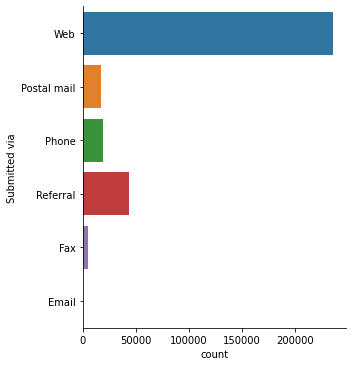

In [19]:
sns.catplot(kind="count", y = "Submitted via", data = data_raw)
pass

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


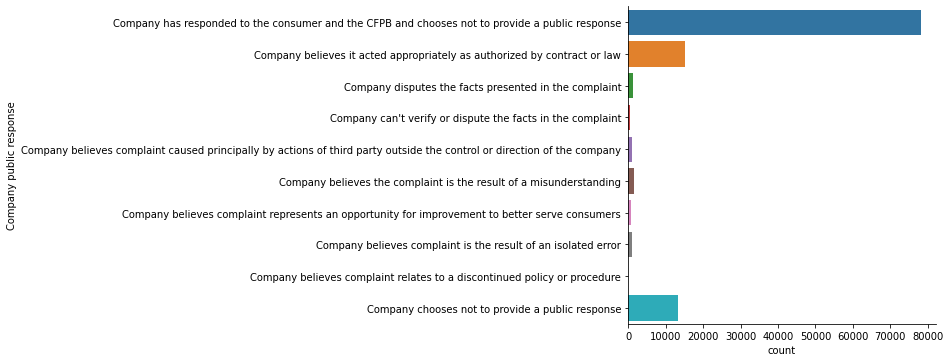

In [20]:
sns.catplot(kind="count", y = "Company public response", data = data_raw)
pass

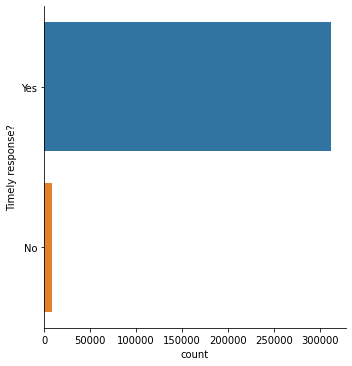

In [21]:
sns.catplot(kind="count", y = "Timely response?", data = data_raw)
pass

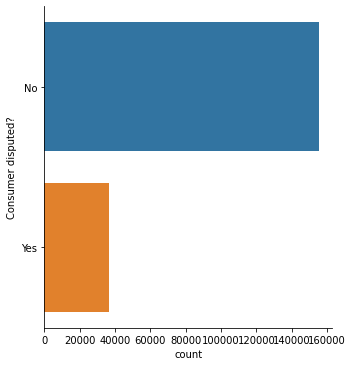

In [22]:
sns.catplot(kind="count", y = "Consumer disputed?", data = data_raw)
pass

## 3. Обработка пропущенных значений

Как было видно из описания таблицы, в некоторых столбцах присутствуют пропущенные значения. Поскольку оставшиеся признаки являются категориальными, пропущенные значения можно заполнить самым популярным значением в столбце.

In [23]:
data_raw[data_raw.columns].count(axis=0)

Date received                   320589
Product                         320589
Sub-product                     261841
Issue                           320589
Sub-issue                       187704
Consumer complaint narrative     96189
Company public response         112593
Company                         320589
State                           315734
ZIP code                        291569
Tags                             43991
Consumer consent provided?      172648
Submitted via                   320589
Company response to consumer    320588
Timely response?                320589
Consumer disputed?              192125
dtype: int64

Пропущенные значения имеются в столбцах: **Sub-product**, **Sub-issue**, **Consumer complaint narrative**, **Company public response**, **State**, **ZIP code**,**Tags**, **Consumer consent provided?**, **Company response to consumer**, **Consumer disputed?**.

In [24]:
data_raw['Sub-issue'].describe()['top']

'Information belongs to someone else'

In [25]:
data_fill = data_raw.copy(deep=True)

In [26]:
data_describe = data_fill.describe(include = 'object')
for c in data_fill.columns:
    data_fill[c] = data_fill[c].fillna(data_describe[c]['top'])

In [28]:
data_fill.describe()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
count,320589,320589,320589,320589,320589,320589,320589,320589,320589,320589,320589,320589,320589,320589,320589,320589
unique,2717,18,76,164,215,94398,10,3755,63,15131,3,4,6,8,2,2
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,Closed with explanation,Yes,No
freq,888,69084,114123,33534,147540,224635,286241,28538,48708,30894,297776,244204,236272,248223,312560,283760


In [29]:
data_fill[data_fill.columns].count(axis=0)

Date received                   320589
Product                         320589
Sub-product                     320589
Issue                           320589
Sub-issue                       320589
Consumer complaint narrative    320589
Company public response         320589
Company                         320589
State                           320589
ZIP code                        320589
Tags                            320589
Consumer consent provided?      320589
Submitted via                   320589
Company response to consumer    320589
Timely response?                320589
Consumer disputed?              320589
dtype: int64

## 4. Обработка категориальных признаков

Для начала обработаем столбцы с *бинарными* признаками. В нашем случае это **Timely response?** и **Consumer disputed?**.

In [30]:
binary_columns    = [c for c in data_fill.columns if data_describe[c]['unique'] == 2]
print(binary_columns)

['Timely response?', 'Consumer disputed?']


In [31]:
data_fill['Timely response?'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
data_fill.at[data_fill['Timely response?'] == 'No', 'Timely response?'] = 0
data_fill.at[data_fill['Timely response?'] == 'Yes', 'Timely response?'] = 1
data_fill['Timely response?'].describe()

count     320589
unique         2
top            1
freq      312560
Name: Timely response?, dtype: int64

In [33]:
data_fill['Consumer disputed?'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
data_fill.at[data_fill['Consumer disputed?'] == 'No', 'Consumer disputed?'] = 0
data_fill.at[data_fill['Consumer disputed?'] == 'Yes', 'Consumer disputed?'] = 1
data_fill['Consumer disputed?'].describe()

count     320589
unique         2
top            0
freq      283760
Name: Consumer disputed?, dtype: int64

Для *небинарных* признаков применим метод *векторизации*, а именно метод `get_dummies` из Pandas.

Но перед этим исключим из рассмотрения столбцы **Consumer complaint narrative**, **Date received**, **Company** и **ZIP code**, поскольку у них слишком много уникальных значений.

In [35]:
len(data_fill['Consumer complaint narrative'].unique())

94398

In [36]:
len(data_fill['ZIP code'].unique())

15131

In [37]:
len(data_fill['Date received'].unique())

2717

In [38]:
len(data_fill['Company'].unique())

3755

In [39]:
data_excl = data_fill.drop(['Consumer complaint narrative', 'ZIP code', 'Date received', 'Company', 'Sub-issue', 'State'], axis = 1)

In [40]:
nonbinary_columns = [c for c in data_excl.columns if data_describe[c]['unique'] > 2]
nonbinary_columns.remove('Product')
print(nonbinary_columns)

['Sub-product', 'Issue', 'Company public response', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Company response to consumer']


In [41]:
data_excl[nonbinary_columns]

,Sub-product,Issue,Company public response,Tags,Consumer consent provided?,Submitted via,Company response to consumer
0,Checking account,Managing an account,Company has responded to the consumer and the ...,Older American,Consent provided,Web,In progress
1,Checking account,Managing an account,Company has responded to the consumer and the ...,Servicemember,Consent provided,Postal mail,In progress
2,Other debt,Attempts to collect debt not owed,Company has responded to the consumer and the ...,Servicemember,Consent provided,Web,In progress
3,Payday loan debt,Attempts to collect debt not owed,Company has responded to the consumer and the ...,Servicemember,Consent provided,Web,Closed with explanation
4,Medical debt,Communication tactics,Company has responded to the consumer and the ...,Servicemember,Consent provided,Web,Closed with explanation
...,...,...,...,...,...,...,...
320584,Credit reporting,APR or interest rate,Company has responded to the consumer and the ...,Servicemember,Consent provided,Web,Closed without relief
320585,Home equity loan or line of credit,"Loan servicing, payments, escrow account",Company has responded to the consumer and the ...,Servicemember,Consent provided,Phone,Closed without relief
320586,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Company has responded to the consumer and the ...,Servicemember,Consent provided,Web,Closed without relief
320587,Credit reporting,Balance transfer,Company has responded to the consumer and the ...,Servicemember,Consent provided,Referral,Closed with relief


In [42]:
data_nonbinary = pd.get_dummies(data_excl[nonbinary_columns])

In [43]:
len(data_nonbinary.columns)

271

## 5. Нормализация

После исключения из рассмотрения признака **Complaint ID**, остались только категориальные признаки, обработанные в п.4, а значит нормализация не требуется.

## 6. Разбиение на обучающую и тестовую выборки

Для начала соединим все обработанные данные в один фрейм.

In [44]:
data = pd.concat((data_nonbinary, data_excl[binary_columns], data_excl['Product']), axis=1)
print(data.shape)

(320589, 274)


In [45]:
data.describe()

,Sub-product_(CD) Certificate of deposit,Sub-product_Auto,Sub-product_Auto debt,Sub-product_CD (Certificate of Deposit),Sub-product_Cashing a check without an account,Sub-product_Check cashing,Sub-product_Check cashing service,Sub-product_Checking account,Sub-product_Conventional adjustable mortgage (ARM),Sub-product_Conventional fixed mortgage,Sub-product_Conventional home mortgage,Sub-product_Credit card,Sub-product_Credit card debt,Sub-product_Credit repair,Sub-product_Credit repair services,Sub-product_Credit reporting,Sub-product_Debt settlement,Sub-product_Domestic (US) money transfer,Sub-product_Electronic Benefit Transfer / EBT card,Sub-product_FHA mortgage,Sub-product_Federal student loan,Sub-product_Federal student loan debt,Sub-product_Federal student loan servicing,Sub-product_Foreign currency exchange,Sub-product_General purpose card,Sub-product_General-purpose credit card or charge card,Sub-product_General-purpose prepaid card,Sub-product_Gift card,Sub-product_Gift or merchant card,Sub-product_Government benefit card,Sub-product_Government benefit payment card,Sub-product_Home equity loan or line of credit,Sub-product_Home equity loan or line of credit (HELOC),Sub-product_I do not know,Sub-product_ID prepaid card,Sub-product_Installment loan,Sub-product_International money transfer,Sub-product_Lease,Sub-product_Loan,Sub-product_Medical,...,Issue_Unexpected/Other fees,Issue_Unsolicited issuance of credit card,Issue_Using a debit or ATM card,Issue_Vehicle was damaged or destroyed the vehicle,Issue_Vehicle was repossessed or sold the vehicle,"Issue_Was approved for a loan, but didn't receive money","Issue_Was approved for a loan, but didn't receive the money",Issue_Written notification about debt,Issue_Wrong amount charged or received,Company public response_Company believes complaint caused principally by actions of third party outside the control or direction of the company,Company public response_Company believes complaint is the result of an isolated error,Company public response_Company believes complaint relates to a discontinued policy or procedure,Company public response_Company believes complaint represents an opportunity for improvement to better serve consumers,Company public response_Company believes it acted appropriately as authorized by contract or law,Company public response_Company believes the complaint is the result of a misunderstanding,Company public response_Company can't verify or dispute the facts in the complaint,Company public response_Company chooses not to provide a public response,Company public response_Company disputes the facts presented in the complaint,Company public response_Company has responded to the consumer and the CFPB and chooses not to provide a public response,Tags_Older American,"Tags_Older American, Servicemember",Tags_Servicemember,Consumer consent provided?_Consent not provided,Consumer consent provided?_Consent provided,Consumer consent provided?_Consent withdrawn,Consumer consent provided?_Other,Submitted via_Email,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_In progress,Company response to consumer_Untimely response
count,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.00000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,320589.000000,3205

In [46]:
X = data.drop('Product', axis = 1) # выбрасываем столбец 'Product'
y = data['Product']
feature_names = X.columns

In [47]:
y.unique()

array(['Checking or savings account', 'Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Mortgage', 'Vehicle loan or lease', 'Student loan',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service', 'Credit card', 'Credit reporting',
       'Prepaid card', 'Other financial service', 'Payday loan',
       'Consumer Loan', 'Money transfers', 'Virtual currency'],
      dtype=object)

In [48]:
mapping = {'Checking or savings account' : 0, 'Debt collection' : 1, 'Credit reporting, credit repair services, or other personal consumer reports' : 2, 
           'Mortgage' : 3, 'Vehicle loan or lease' : 4, 'Student loan' : 5, 'Credit card or prepaid card' : 6, 'Payday loan, title loan, or personal loan' : 7,
           'Money transfer, virtual currency, or money service' : 8, 'Bank account or service' : 9, 'Credit card' : 10, 'Credit reporting' : 11,
           'Prepaid card' : 12, 'Other financial service' : 13, 'Payday loan' : 14, 'Consumer Loan' : 15, 'Money transfers' : 16, 'Virtual currency' : 17}

In [49]:
y = y.map(lambda x: mapping[x])

In [50]:
y

0          0
1          0
2          1
3          1
4          1
          ..
320584    10
320585     3
320586     3
320587    10
320588    10
Name: Product, Length: 320589, dtype: int64

In [51]:
print(feature_names)

Index(['Sub-product_(CD) Certificate of deposit', 'Sub-product_Auto',
       'Sub-product_Auto debt', 'Sub-product_CD (Certificate of Deposit)',
       'Sub-product_Cashing a check without an account',
       'Sub-product_Check cashing', 'Sub-product_Check cashing service',
       'Sub-product_Checking account',
       'Sub-product_Conventional adjustable mortgage (ARM)',
       'Sub-product_Conventional fixed mortgage',
       ...
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
       'Company response to consumer_Closed with relief',
       'Company response to consumer_Closed without relief',
       'Company response to consumer_In progress',
       'Company response to consumer_Untimely response', 'Timely response?',
       'Consumer disputed?'],
      dtype='object', length=273)


In [52]:
X = X.to_numpy()

In [53]:
print(X.shape)
print(y.shape)
N, d = X.shape

(320589, 273)
(320589,)


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

224412 96177


## 7. Метод $kNN$ ближайших соседей

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [3]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.11314506491916451 0.1386535856367953


## 8. Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
err_train = np.mean(y_train != dtree.predict(X_train))
err_test  = np.mean(y_test  != dtree.predict(X_test))

print(err_train, err_test)

0.0013145464591911306 0.0017883693606579535


## 9. Вывод

Таким образом, kNN справился с задачей хорошо, однако Decision Tree показал меньшие ошибки на обучающей и тестовой выборках. Возможно, требуется применение взвешенного kNN из-за несбалансированности классов.